# Khai phá dữ liệu bán lẻ ( Online Retail )

## Thông tin dữ liệu

## Bối cảnh

Tập dữ liệu được thu thập từ hệ thống bán lẻ trực tuyến của một công ty tại Anh Quốc, ghi nhận các giao dịch mua bán từ tháng 12 năm 2010 đến tháng 12 năm 2011. Dữ liệu phản ánh hoạt động thực tế của khách hàng tại siêu thị trực tuyến, trên nhiều quốc gia khác nhau.

Mỗi dòng dữ liệu đại diện cho một sản phẩm được bán trong một hóa đơn, bao gồm các thông tin như:

+ CustomerID: Mã khách hàng
+ InvoiceNo: Số hóa đơn
+ StockCode: Mã sản phẩm
+ Description: Mô tả sản phẩm
+ Quantity: Số lượng bán
+ UnitPrice: Giá bán
+ InvoiceDate: Ngày giao dịch
+ Country: Quốc gia khách hàng

## Import các thư viện cần thiết

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


## Khám phá dữ liệu ( EDA )

In [2]:
url = "https://raw.githubusercontent.com/Phtzone/SGU25_KPDL_Group/main/Lab03/1.2/EDA%20Online%20Retail/Online%20Retail.xlsx"
df = pd.read_excel(url)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Kiểm tra dữ liệu thiếu và trùng lặp

In [5]:
# Số lượng giá trị bị thiếu trong mỗi cột
missing = df.isna().sum().sort_values(ascending=False)
display(missing.to_frame(name='missing_values'))

,missing_values
CustomerID,135080
Description,1454
StockCode,0
InvoiceNo,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [6]:
print('DataFrame đã xóa missing data')
df = df.dropna()
display(df.isna().sum().to_frame(name='missing_values'))

DataFrame đã xóa missing data


,missing_values
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [7]:
print(f'Số dòng trùng lặp: {df.duplicated(keep=False).sum() }')

Số dòng trùng lặp: 10062


In [8]:
df = df.drop_duplicates()
print(f'Số dòng trùng lặp sau khi xoá: {df.duplicated(keep=False).sum() }')

Số dòng trùng lặp sau khi xoá: 0


In [9]:
# xem dữ liệu biến country
countries = df["Country"].unique()
country_count = df["Country"].value_counts()
print(f'Các quốc gia có trong dataset: {country_count}')


Các quốc gia có trong dataset: Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


### Trực quan hoá dữ liệu

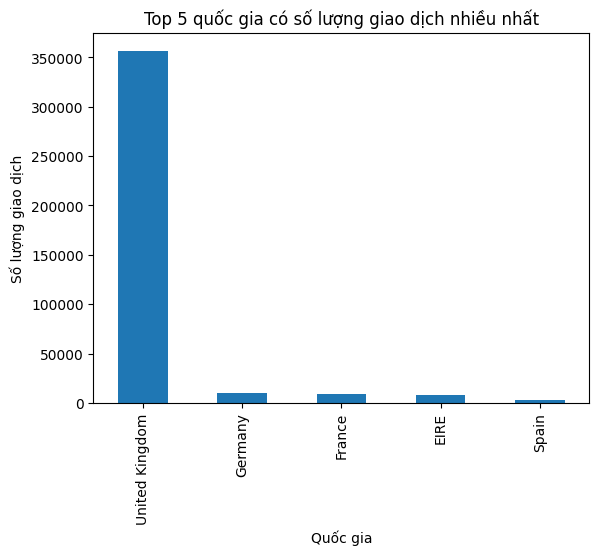

In [10]:
# top 5 quốc gia có só lượng mua nhiều nhất
top_5= country_count.head(5)
top_5.plot(kind='bar', title='Top 5 quốc gia có số lượng giao dịch nhiều nhất', xlabel='Quốc gia', ylabel='Số lượng giao dịch')
plt.show()


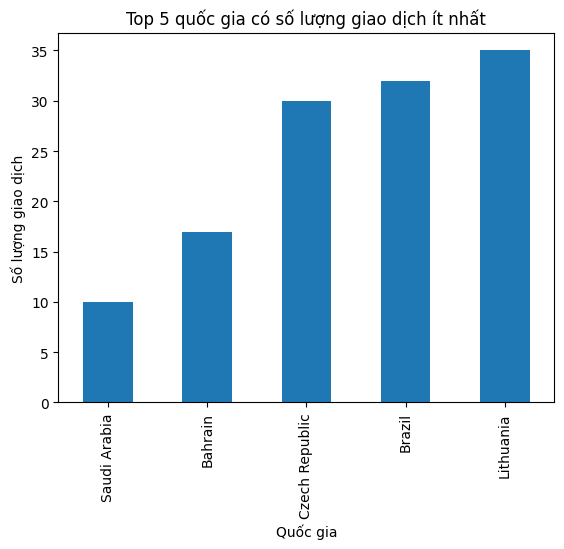

In [11]:
# top 5 quốc gia có só lượng mua ít nhất
bottom_5= country_count.sort_values(ascending=True).head(5)
bottom_5.plot(kind='bar', title='Top 5 quốc gia có số lượng giao dịch ít nhất', xlabel='Quốc gia', ylabel='Số lượng giao dịch')
plt.show()

/tmp/ipykernel_3495/3768667086.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["Amount"]


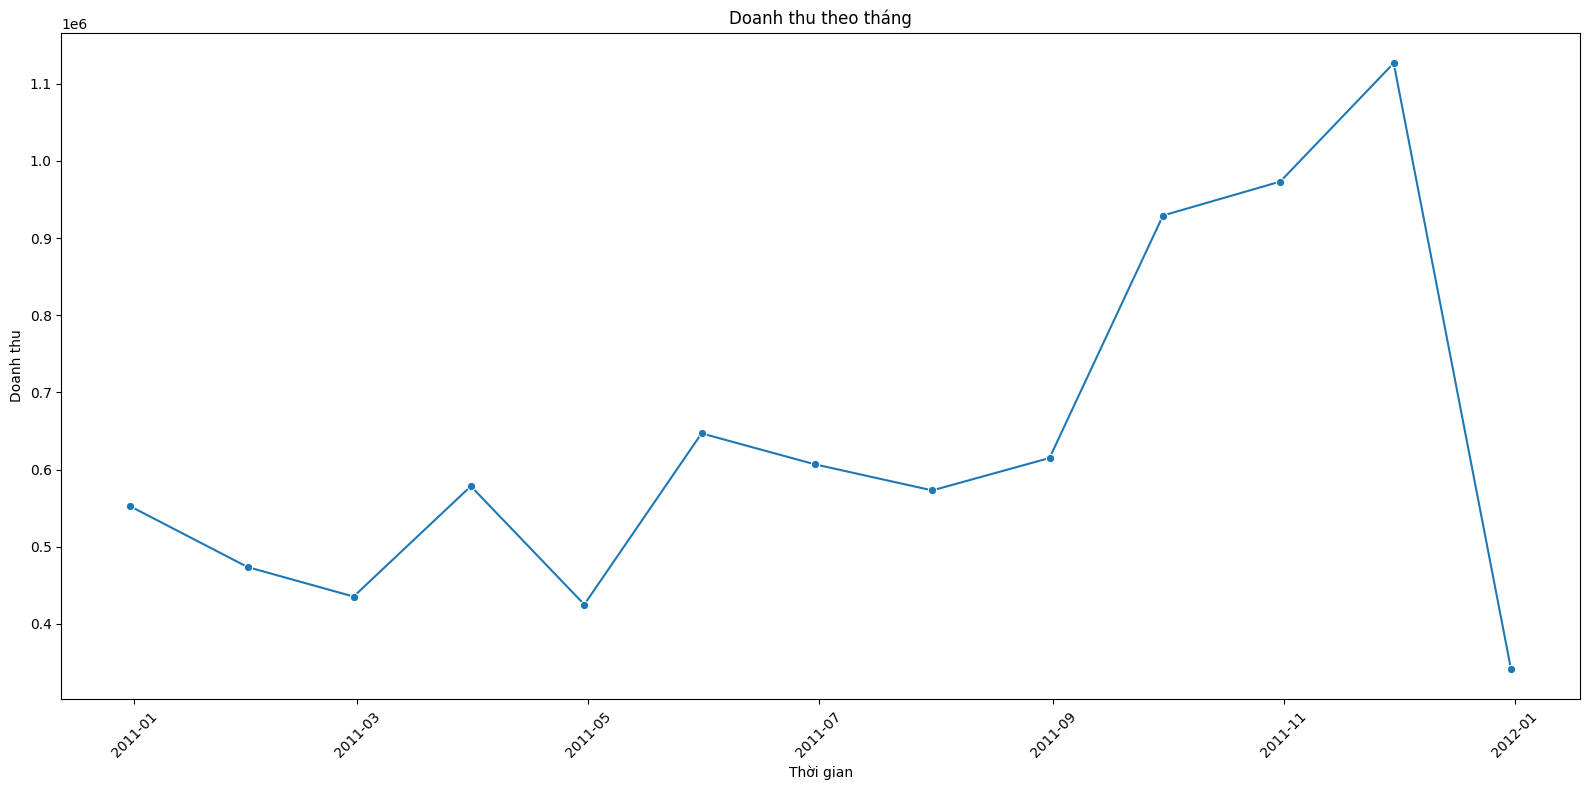

In [12]:
df["Amount"] = df["Quantity"] * df["UnitPrice"]
rev_monthly = (
    df.set_index("InvoiceDate")
      .resample("M")["Amount"]
      .sum()
      .reset_index()
)

plt.figure(figsize=(16, 8))
sns.lineplot(data=rev_monthly, x="InvoiceDate", y="Amount", marker="o")
plt.title("Doanh thu theo tháng")
plt.xlabel("Thời gian")
plt.ylabel("Doanh thu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3495/3793256416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="Amount", y="Description", palette="viridis")


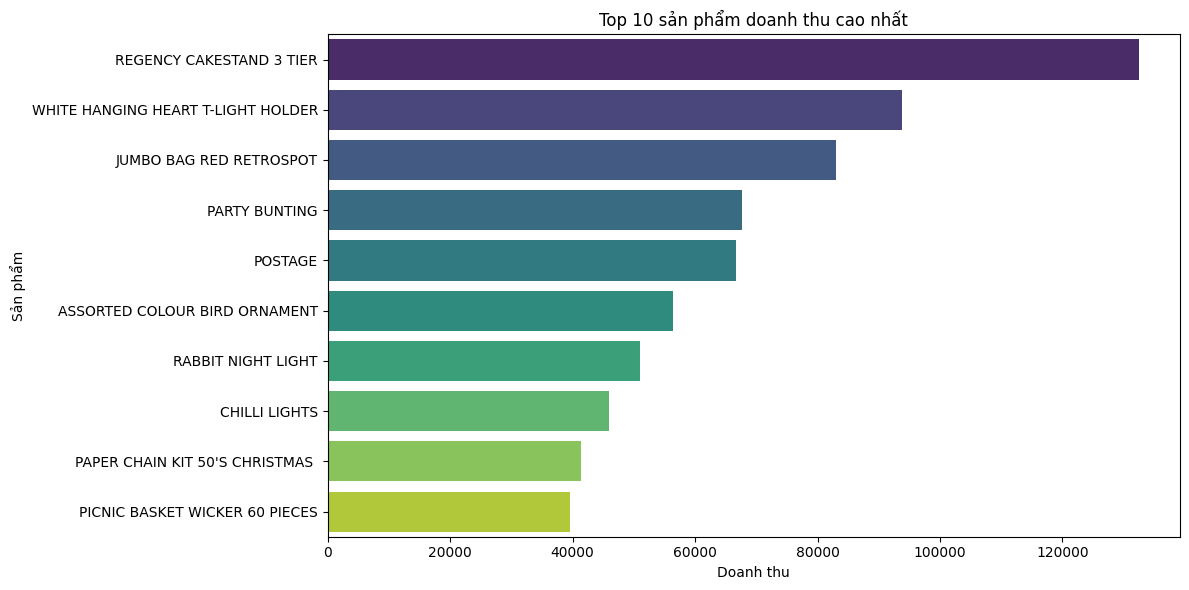

In [13]:
# Tính doanh thu từng sản phẩm
df["Amount"] = df["Quantity"] * df["UnitPrice"]

top_products = (
    df.groupby("Description", as_index=False)["Amount"]
      .sum()
      .sort_values("Amount", ascending=False)
      .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(data=top_products, x="Amount", y="Description", palette="viridis")
plt.title("Top 10 sản phẩm doanh thu cao nhất")
plt.xlabel("Doanh thu")
plt.ylabel("Sản phẩm")
plt.tight_layout()
plt.show()
